In [9]:
pip install dicom2nifti

   ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
   --------- ------------------------------ 10.2/43.6 kB ? eta -:--:--
   ------------------ --------------------- 20.5/43.6 kB 320.0 kB/s eta 0:00:01
   ------------------------------------- -- 41.0/43.6 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 kB 266.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 1.7 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.8 MB 1.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.8 MB 2.8 MB/s eta 0:00:01
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import shutil
import tempfile
from pathlib import Path
import dicom2nifti

In [3]:
def dcm2nii(CT_dcm_path, nii_out_path):

    '''
    - CT_dcm_path: Path to the directory containing MRI DICOM files
    - nii_out_path: Path to the directory where the resulting NIfTI file will be saved.
    - tempfile.TemporaryDirectory(): create a temporary directory (tmp) that will be automatically
      deleted when the block of code inside it finishes execution
    - dicom2nifti.convert_directory: convert the DICOM file to NIfTI format.
    '''

    with tempfile.TemporaryDirectory() as tmp:
        tmp = Path(str(tmp))

        # convert dicom directory to nifti
        dicom2nifti.convert_directory(CT_dcm_path, str(tmp),
                                      compression=True, reorient=True)

        #looks for the first NIfTI file (*nii.gz) in temp
        nii = next(tmp.glob('*nii.gz'))

        # copy nifti file to the specified output path and named it 'MRI.nii.gz'
        shutil.copy(nii, nii_out_path+'CT.nii.gz')

In [4]:
CT_dcm_path = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/DULIEU/Images/HUYNHNHANNGHIA/1.2.840.113619.2.491.3.2831158058.177.1710909318.873.5/"
nii_out_path = "./data/images/"

In [5]:
dcm2nii(CT_dcm_path, nii_out_path)

https://medium.com/@pmegne/dicom-to-nifti-conversion-dc436c0b5fa6

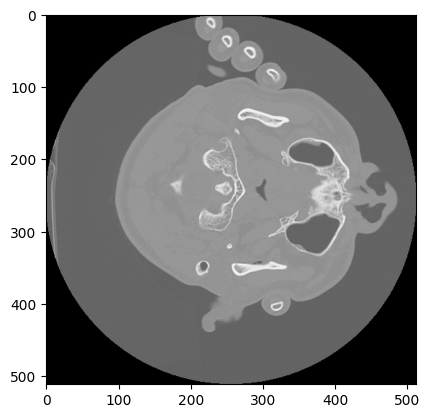

In [57]:
import nibabel as nib
import matplotlib.pyplot as plt

test_load = nib.load("./data/images/CT.nii.gz").get_fdata()
test_load.shape

# Lấy slice trung tâm của ảnh để hiển thị
test = test_load[:,:,1]
plt.imshow(test, cmap="gray")
plt.show()

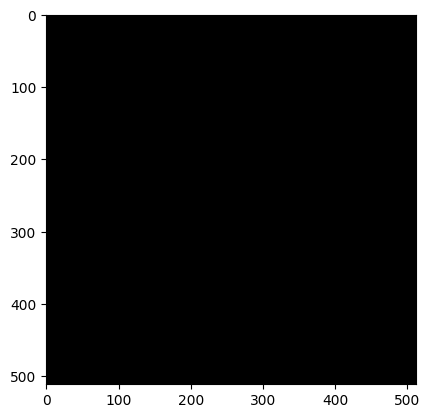

In [12]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load dữ liệu từ file nifti và lấy dữ liệu thực tế
test_load = nib.load("./data/ground_truths/labtest2/ID_02b882cc_ID_a4892e60ae.nii.gz").get_fdata()
# Lấy slice trung tâm của ảnh để hiển thị
test = test_load[:,:,1]
plt.imshow(test, cmap="gray")
plt.show()
# Chuyển đổi hình dạng của dữ liệu thực tế, không phải hình dạng của biến lưu trữ hình dạng
# T = np.transpose(test_load, (1, 2, 0))

# # Lấy slice trung tâm của ảnh để hiển thị
# test = T[:,:,16]  # Lấy slice trung tâm theo chiều ảnh thứ 3 (index bắt đầu từ 0)
# plt.imshow(test, cmap="gray")
# plt.show()
##########Không ảnh hưởng, đổi lại ((32, 512, 512) to (512, 512, 32) không xem được gì cả)